In [1]:
import numpyro

numpyro.enable_x64()
numpyro.set_platform('gpu')

In [6]:
import arviz as az
from leaguedata.plot import plot_history, plot_compare_plotly
from leaguedata.model import generate_coinflip_history, generate_nasty_loser_q, generate_obvious_loser_q

# Coinflip History

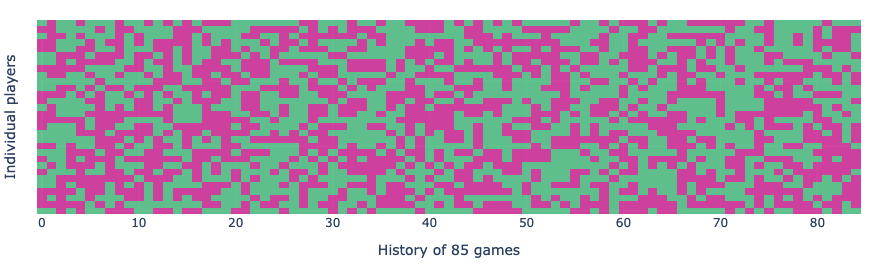

In [16]:
mock_history = generate_coinflip_history(number_of_players=30, number_of_games=85)
plot_history(mock_history, save_to='docs/loserQ/assets/validation_coinflip.json');

In [7]:
from leaguedata.inference import fit_history_with_dmc

mock_history = generate_coinflip_history(number_of_players=100, number_of_games=85)
dict_of_id = fit_history_with_dmc(mock_history)
compare_dataframe = az.compare(dict_of_id)
compare_dataframe

sample: 100%|██████████| 3000/3000 [00:10<00:00, 280.39it/s]


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
1 games,0,-5891.697156,2.026020,0.000000,4.064871e-01,1.956261,0.000000,False,log
2 games,1,-5891.992179,3.883861,0.295023,3.033466e-01,2.676603,1.741235,False,log
0 games,2,-5892.787404,1.113152,1.090248,2.173233e-01,0.196436,1.958819,False,log
3 games,3,-5894.070511,7.701861,2.373355,0.000000e+00,3.380038,2.592405,False,log
4 games,4,-5898.513922,15.516812,6.816766,0.000000e+00,4.291769,3.666744,False,log
5 games,5,-5904.514625,31.722199,12.817470,7.284296e-02,6.190278,5.796779,False,log
6 games,6,-5926.229191,62.151190,34.532035,1.927347e-13,7.466954,6.974662,False,log


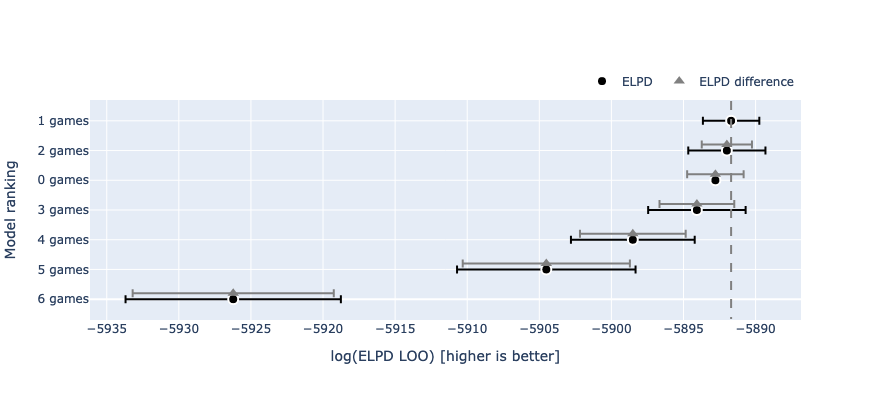

In [8]:
plot_compare_plotly(compare_dataframe);

# Obvious LoserQ

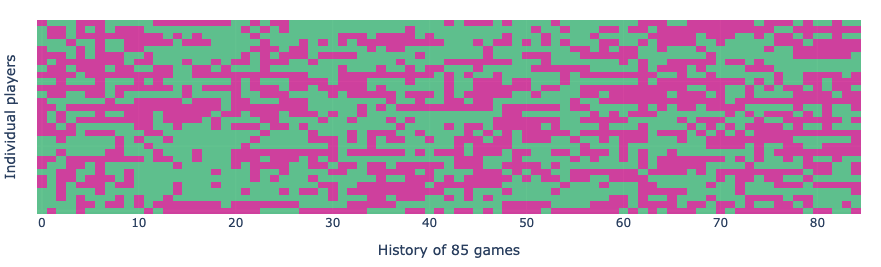

In [17]:
mock_history = generate_obvious_loser_q(number_of_players=30, number_of_games=85)
plot_history(mock_history, save_to='docs/loserQ/assets/validation_obvious.json');

In [10]:
from leaguedata.inference import fit_history_with_dmc

mock_history = generate_obvious_loser_q(number_of_players=100, number_of_games=85)
dict_of_id = fit_history_with_dmc(mock_history)
compare_dataframe = az.compare(dict_of_id)
compare_dataframe

sample: 100%|██████████| 3000/3000 [00:11<00:00, 272.48it/s]


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
4 games,0,-5388.085442,15.871664,0.000000,8.608237e-01,41.400418,0.000000,False,log
5 games,1,-5401.498259,31.111001,13.412817,5.580400e-11,41.404370,5.202933,False,log
6 games,2,-5421.793163,62.942929,33.707722,7.581738e-02,41.875695,9.114784,False,log
3 games,3,-5464.709213,9.363559,76.623771,5.494656e-02,39.346277,13.532966,False,log
2 games,4,-5537.876488,6.324575,149.791046,2.992684e-03,35.699570,19.145870,False,log
1 games,5,-5692.605867,5.454538,304.520425,1.058436e-10,25.577986,25.464808,False,log
0 games,6,-5894.820401,5.650096,506.734960,5.419719e-03,1.880317,41.513625,False,log


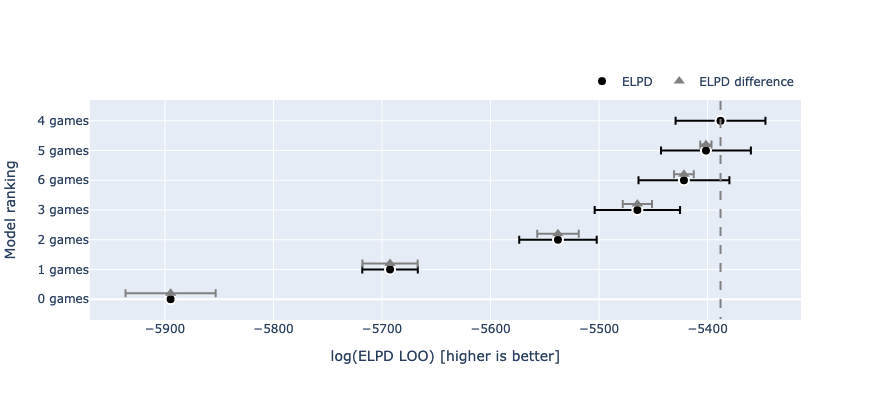

In [11]:
plot_compare_plotly(compare_dataframe);

# Nasty LoserQ

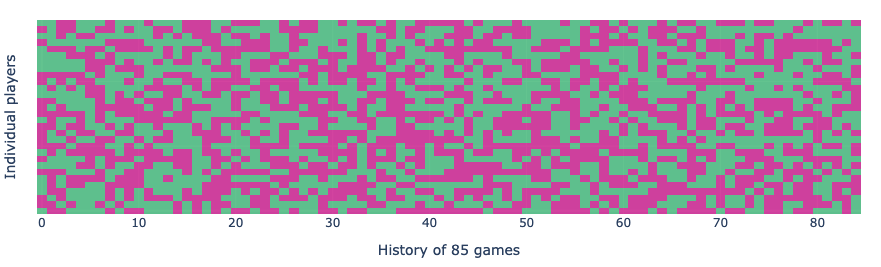

In [18]:
mock_history = generate_nasty_loser_q(number_of_players=30, number_of_games=85)
plot_history(mock_history, save_to='docs/loserQ/assets/validation_nasty.json');

In [13]:
from leaguedata.inference import fit_history_with_dmc

mock_history = generate_nasty_loser_q(number_of_players=100, number_of_games=85)
dict_of_id = fit_history_with_dmc(mock_history)
compare_dataframe = az.compare(dict_of_id)
compare_dataframe

sample: 100%|██████████| 3000/3000 [00:11<00:00, 263.70it/s]


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
4 games,0,-5885.169266,15.865142,0.000000,6.238868e-01,6.582792,0.000000,False,log
2 games,1,-5889.416614,4.178158,4.247348,1.782998e-01,4.010236,5.576517,False,log
1 games,2,-5891.287422,2.209462,6.118157,7.135097e-13,2.239560,5.936962,False,log
3 games,3,-5891.730793,8.291999,6.561528,5.070574e-13,4.716641,5.525286,False,log
0 games,4,-5892.630023,1.287751,7.460757,1.978134e-01,0.873975,6.580460,False,log
5 games,5,-5895.353883,32.277963,10.184618,0.000000e+00,7.706281,3.903937,False,log
6 games,6,-5912.510121,64.054617,27.340856,0.000000e+00,9.267680,6.474308,False,log


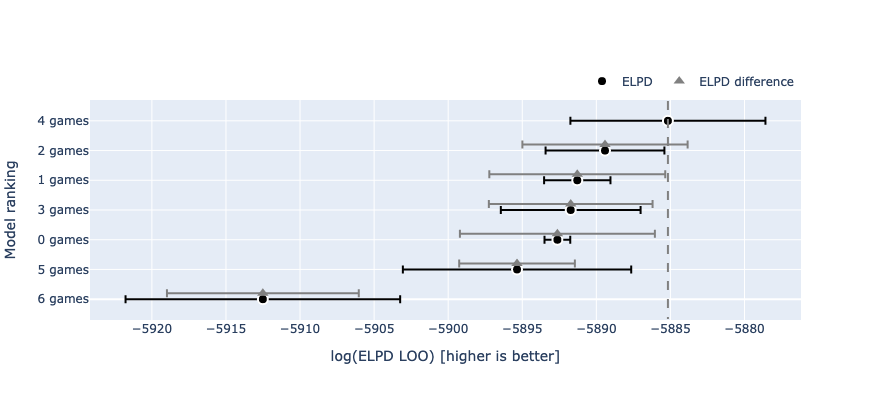

In [14]:
plot_compare_plotly(compare_dataframe);

In [ ]:
import arviz as az 
import jax
from numpyro.infer import MCMC, NUTS
from jax.random import PRNGKey

tier_list = ['IRON', 'BRONZE', 'SILVER', 'GOLD', 'PLATINUM', 'EMERALD', 'DIAMOND', 'MASTER', 'GRANDMASTER',
             'CHALLENGER']

dict_of_id = {}

local_history = history
smallest_history_size = tree_reduce(min, tree_map(lambda x: x.shape[0], local_history))
flat_tree, _ = tree_flatten(tree_map(lambda x: x[-smallest_history_size:], local_history))
observed_history = jnp.asarray(flat_tree)

for i in range(6, -1, -1):
    
    markov_util = DMCModel(i)
    encoded_history = np.apply_along_axis(markov_util.binary_serie_to_categorical, 1, observed_history)
    encoded_history = jax.device_put(encoded_history)

    def model():
        
        if i != 0: 
            proba = numpyro.sample('proba', dist.Uniform(low=jnp.zeros(2**markov_util.n), high=jnp.ones(2**markov_util.n)))
        else:
            proba = numpyro.sample('proba', dist.Uniform(low=0, high=1))*jnp.ones(2**markov_util.n)
                
        transition_matrix = markov_util.build_transition_matrix(proba)
        
        def transition_fn(_, x):
            return tfd.Categorical(probs=transition_matrix[x])
        
        encoded_history = np.apply_along_axis(markov_util.binary_serie_to_categorical, 1, observed_history)
        
        likelihood_dist = tfd.MarkovChain(
                initial_state_prior=tfd.Categorical(probs=markov_util.uniform_prior),
                transition_fn=transition_fn,
                num_steps=encoded_history.shape[1]
        )
        
        numpyro.sample('likelihood', likelihood_dist, obs=encoded_history)

    kernel = NUTS(model)
    num_samples = 2000
    mcmc = MCMC(kernel, num_warmup=1000, num_samples=num_samples, num_chains=4, chain_method='vectorized')
    mcmc.run(
        PRNGKey(0)
    )
    
    dict_of_id[str(i)] = az.from_numpyro(mcmc)

az.plot_compare(az.compare(dict_of_id));

In [ ]:
import pandas as pd 
from chainconsumer import ChainConsumer, Chain, Truth

best_id = dict_of_id['1']
markov_util = DMCModel(1)
samples = np.asarray(az.extract(best_id).proba)

dict_of_samples = {str(state) + '-> (1)':samples[i] for i, state in enumerate(markov_util.get_states())}

cc = ChainConsumer()
cc.add_chain(Chain(samples=pd.DataFrame.from_dict(dict_of_samples), name='ref'))
cc.plotter.plot()
plt.show()
#plt.savefig('test_summaries_corner.png', bbox_inches='tight')

"""
cc.plotter.plot_summary()
plt.tight_layout()
plt.savefig('test_summaries.png', bbox_inches='tight')
"""

In [ ]:
cc.plotter.plot_distributions();

In [ ]:
import pandas as pd 
from chainconsumer import ChainConsumer, Chain, Truth

best_id = dict_of_id['4']
samples = np.asarray(az.extract(best_id).proba)

dict_of_samples = {str(state) + '-> (1)':samples[i] for i, state in enumerate(markov_util_ref.get_states())}

cc = ChainConsumer()
cc.add_chain(Chain(samples=pd.DataFrame.from_dict(dict_of_samples), name='ref'))
cc.add_truth(Truth(location={str(state) + '-> (1)':probs_keys[sum(state)/4] for i, state in enumerate(markov_util_ref.get_states())}, line_style=":", color="red"))
cc.plotter.plot()
plt.show()
#plt.savefig('test_summaries_corner.png', bbox_inches='tight')

"""
cc.plotter.plot_summary()
plt.tight_layout()
plt.savefig('test_summaries.png', bbox_inches='tight')
"""